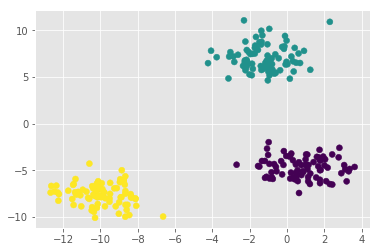

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import style
from sklearn.datasets import make_blobs
style.use('ggplot')
%matplotlib inline

X,y = make_blobs(n_samples=250,n_features=2,centers=3,cluster_std=1.2,random_state=100)

plt.scatter(X[:,0],X[:,1],c=y)

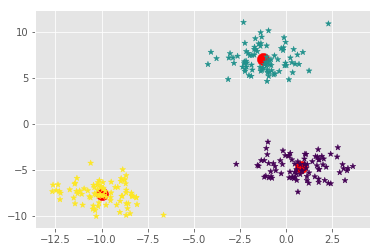

In [35]:
class kmeans() :
    def __init__(self,k=3,tol=0.001,maxiter=300):
        self.k = k
        self.tol = tol
        self.maxiter = maxiter
    
    def fit(self,data) :
        
        self.centroids = {}
        
        self.centroids[0] = data[0]
        self.centroids[1] = data[1]
        self.centroids[2] = data[2]
        
        for i in range(self.maxiter) :
            
            self.classifications = {}
            
            self.classifications[0] = []
            self.classifications[1] = []
            self.classifications[2] = []
            
            for featureset in data :
                
                distances = [np.linalg.norm(featureset - self.centroids[0]),
                             np.linalg.norm(featureset - self.centroids[1]),
                             np.linalg.norm(featureset - self.centroids[2])]
                   
                classification = np.argmin(distances)
            
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)

            self.centroids[0] = np.average(self.classifications[0],axis=0)
            self.centroids[1] = np.average(self.classifications[1],axis=0)
            self.centroids[2] = np.average(self.classifications[2],axis=0)  

            optimized = True

            orginal_centroid = prev_centroids[0]

            current_centroid = self.centroids[0]

            if np.sum((current_centroid - orginal_centroid)/orginal_centroid*100) > self.tol:

                optimized = False

            orginal_centroid = prev_centroids[1]

            current_centroid = self.centroids[1]

            if np.sum((orginal_centroid - current_centroid)/orginal_centroid*100) > self.tol:

                     optimized = False


            orginal_centroid = prev_centroids[2]

            current_centroid = self.centroids[2]

            if np.sum((orginal_centroid-current_centroid)/orginal_centroid*100) > self.tol:

                optimized = False

            if optimized == True:
                break

clf = kmeans()
clf.fit(X)
    
plt.scatter(clf.centroids[0][0],clf.centroids[0][1],marker="o",s=150,color='r')
plt.scatter(clf.centroids[1][0],clf.centroids[1][1],marker="o",s=150,color='r')
plt.scatter(clf.centroids[2][0],clf.centroids[2][1],marker="o",s=150,color='r')
  
plt.scatter(X[:,0],X[:,1],c=y,marker='*')